<a href="https://colab.research.google.com/github/swleegit/Hongong_ML/blob/main/03_02%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-최근접 이웃의 한계
[데이터](http://bit.ly/perch_data)  
- 학습데이터 범위에서 많이 벗어나는 데이터에 대한 예측은 경계값으로 한정된다.


In [ ]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
train_test_split(perch_length, perch_weight, random_state = 42)

#input 데이터를 2차원 배열로 전환 

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

#이웃수 3인 KNeighborsClassifier 모델

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor().fit(train_input, train_target)
knr.predict([[50]])

array([1010.])

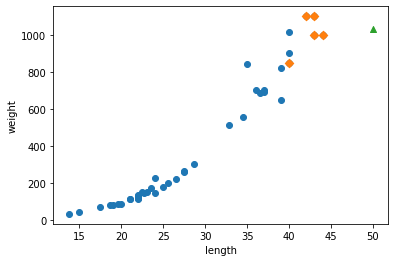

In [ ]:
#타깃값하고 예측값이 차이가 많이남.
#원인을 알기위해서는 시각화가 best

import matplotlib.pyplot as plt
distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

#농어 데이터

plt.scatter(50,1033, marker = "^")

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
#KNeighborsRegressor 예측값 : 선택된 이웃의 평균 : 이를 코드로 작성함.
print(np.mean(train_target[indexes]))

1010.0


In [ ]:
#KNeighborsRegressor는 학습한 데이터에서 추출되므로 데이터 값이 너무 크더라도 경계값과 같다.
print(knr.predict([[100]]))

[1010.]


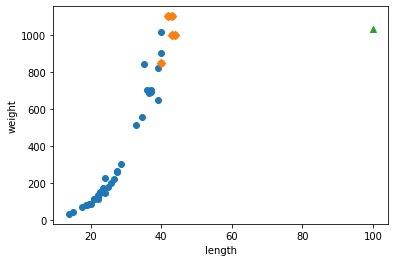

In [ ]:
#타깃값하고 예측값이 차이가 많이남.
#원인을 알기위해서는 시각화가 best

import matplotlib.pyplot as plt
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

#농어 데이터

plt.scatter(100,1033, marker = "^")

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 선형회귀(Linear Regression)

<img src = "https://drive.google.com/uc?id=1TYfJCuMPW7cl1GFNDASVhLgdCpDfx8Tz" object-fit>  
1번은 평균으로 예측한다 : 결정계수가 0 이 나올 가능성이크다.

2번은 반대로 예측한것으로 결정계수가 음수가 나올 수 있다.

- sklearn.linear_model에 LinearRegerssion에 있다.

- KNeighbors는 학습 = 단순 데이터 저장 
- LinearRegression의 학습 = 계수와 절편을 얻는 것

- coefficient = weight = 계수 = .coef_
- intercept = 절편 = .intercept_

- fit_intercept = False로 지정하면 절편을 학습하지 않는다.

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.predict([[50]]))

[1241.83860323]


In [ ]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


- coef_, intercept_는 머신러닝 알고리즘이 찾은 **모델파라미터(model parameter)**

- 많은 머신러닝 알고리즘의 훈련(fit)과정은 최적의 모델파라미터를 찾는것과 같다.

- 이를 **모델 기반 학습**이라고 한다.

- 앞서 사용한 k-최근접 이웃에는 모델파라미터가 없다(단순저장) 이는 **사례기반학습**이라고 한다.

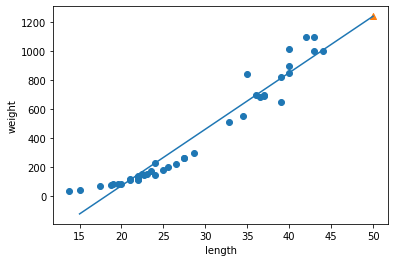

In [ ]:
#훈련데이터의 산점도를 그리면 
plt.scatter(train_input, train_target)

#일차함수 그리기 x 양끝, y 양끝
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_ + lr.intercept_])

#농어 50cm 데이터 
plt.scatter(50,1241.8, marker = "^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [ ]:
#LinearRegression도 회귀이므로 점수는 결정계수다.

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


# 다항회귀

- 주어진 데이터 범위 내에서는 어느정도 합리적이나, x값이 작아지게 되면 무게는 음수를 갖게된다. 최적의 곡선을 찾는 것이 합리적이다.

- 곡선이면 선형식을 만족하지 못하지 않는가?
<img src = "https://drive.google.com/uc?id=1_U9PKwTEkow-fDdEeoW0h5uorBbaejx5" object-fit>  

- 결과적으로 식변형과 치환을 통해 일차식 형태로 나올 수 있으면 모두 선형회귀를 사용할 수 있다.

- 이차함수도 x^2를 x로 치환하면 일차식으로 생각할 수 있다.

- 따라서 데이터의 분포를 보고 수학적으로 어떤식으로 표현하면 좋을지 생각하고 그 식을 치환과 식변형을 통해 선형식으로 만들 수 있는지 생각하면 된다.

- 결국 LinearRegression은 데이터를 나타내는 수식(함수)를 만들어내는 것이다.

- 적절한 함수식에 따라 데이터 변형을 통해 열을 늘려도 target값은 변경할 필요 없다.


In [ ]:
#제곱항을 치환하면 결국 특성이 2개 꼴이다.
#input데이터에 제곱한 열을 추가해야한다.
import numpy as np
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly.shape)
print(test_poly.shape)

(42, 2)
(14, 2)


In [ ]:
lr = LinearRegression().fit(train_poly, train_target)
lr.predict([[50**2,50]]) #열이 2개로 늘었으니까

array([1573.98423528])

In [ ]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


$$무게 = 1.01길이^2 -21.6길이 + 116$$
$$길이^2을  왕길이로 치환하면,
무게 = 1.01왕길이 -21.6길이 + 116$$

- 이런 방정식을 다항식(polynomial)(=최종 식변형식에 열이 2개이상)이라 부르며 다항식을 사용한 선형회귀를 **다항회귀(polynomial regression)**이라고 한다.



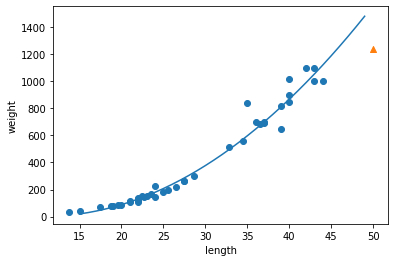

In [ ]:
point = np.arange(15,50)
plt.scatter(train_input, train_target)

#2차함수는 짧게 끊은 1차함수의 연속으로 생각할 수 있다.
#plt.plot(x값, y값)
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

plt.scatter(50,1241.8, marker = "^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
#과소적합임.

0.9706807451768623
0.9775935108325122
